In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, norm
import numpy as np
import warnings

warnings.filterwarnings('ignore')
plt.rc('font', family='d2coding')

In [12]:
poker_df = pd.read_csv(r'C:\Users\user\Documents\GitHub\poker-game-data-analysis\포커 기록지.csv', index_col=0)

In [13]:
poker_df = poker_df.loc[:, ~poker_df.columns.str.startswith('Unnamed')][poker_df.index.str.contains('2024-02-21')]

In [14]:
poker_df

,임동휘,남형준,이도훈,권주찬,오준혁,김태윤,정재영,유승훈
2024-02-21-01,-14200,NaN,NaN,2100.0,2900.0,-4000.0,NaN,13200.0
2024-02-21-02,-5300,NaN,NaN,-7600.0,-700.0,10300.0,NaN,3300.0
2024-02-21-03,9400,NaN,NaN,-1200.0,200.0,-2400.0,5100.0,-11100.0
2024-02-21-04,10800,NaN,NaN,-3700.0,NaN,-2300.0,-6500.0,1700.0
2024-02-21-05,-7900,NaN,NaN,0.0,-15000.0,-4300.0,5900.0,23000.0
2024-02-21-06,16200,NaN,NaN,10000.0,-1000.0,-8700.0,NaN,-15000.0
2024-02-21-07,-15000,NaN,NaN,5700.0,-5200.0,14800.0,NaN,-400.0
2024-02-21-08,-1800,NaN,NaN,-600.0,25500.0,-7300.0,NaN,-15000.0
2024-02-21-09,-6600,NaN,NaN,23700.0,NaN,3000.0,NaN,-20000.0


In [15]:
poker_df.describe()

,임동휘,남형준,이도훈,권주찬,오준혁,김태윤,정재영,유승훈
count,9.000000,0.0,0.0,9.000000,7.000000,9.000000,3.000000,9.000000
mean,-1600.000000,NaN,NaN,3155.555556,957.142857,-100.000000,1500.000000,-2255.555556
std,11226.865101,NaN,NaN,9234.596785,12286.965606,7973.079706,6939.740629,14337.896560
min,-15000.000000,NaN,NaN,-7600.000000,-15000.000000,-8700.000000,-6500.000000,-20000.000000
25%,-7900.000000,NaN,NaN,-1200.000000,-3100.000000,-4300.000000,-700.000000,-15000.000000
50%,-5300.000000,NaN,NaN,0.000000,-700.000000,-2400.000000,5100.000000,-400.000000
75%,9400.000000,NaN,NaN,5700.000000,1550.000000,3000.000000,5500.000000,3300.000000
max,16200.000000,NaN,NaN,23700.000000,25500.000000,14800.000000,5900.000000,23000.000000


In [16]:
pd.DataFrame(poker_df.sum(), columns=["누적 수익"]).T

,임동휘,남형준,이도훈,권주찬,오준혁,김태윤,정재영,유승훈
누적 수익,-14400.0,0.0,0.0,28400.0,6700.0,-900.0,4500.0,-20300.0


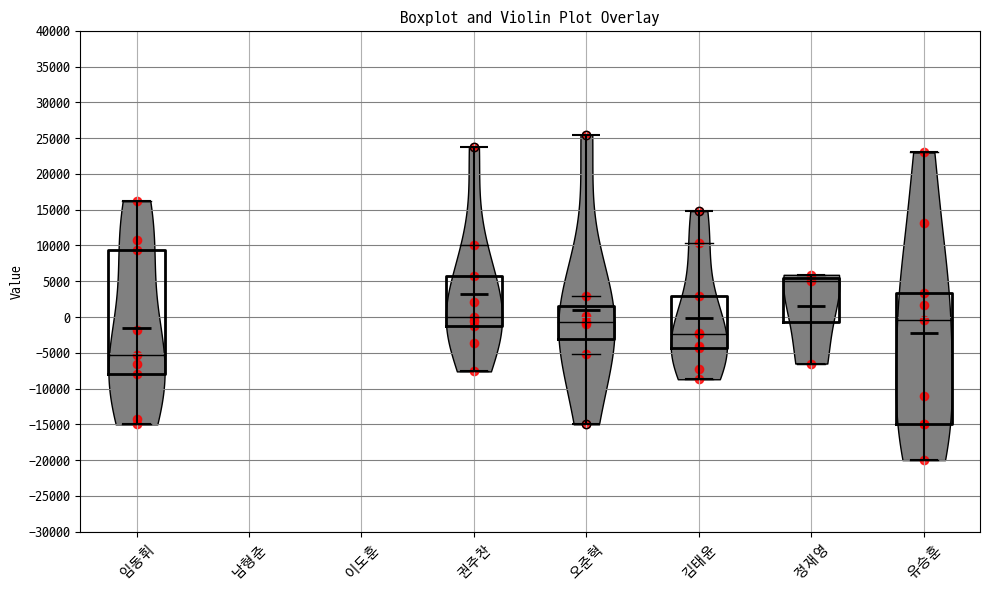

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))



# Create violin plot for non-NaN values in each column
for i, col in enumerate(poker_df.columns, start=1):
    data = poker_df[col].dropna()
    if not data.empty:
        # Violin plot
        parts = plt.violinplot(dataset=[data], positions=[i], showmeans=True, showmedians=False)
        
        # Scatter points
        x = [i] * len(data)
        plt.scatter(x, data, color='red', alpha=0.8)

        # Customize violin plot parts to highlight mean and median
        for pc in parts['bodies']:
            pc.set_facecolor('gray')  # Change violin color
            pc.set_edgecolor('black')
            pc.set_alpha(1)

        # Customize mean marker
        parts['cmeans'].set_color('black')
        parts['cmeans'].set_linewidth(2)
        parts['cbars'].set_edgecolor('black')
        parts['cmaxes'].set_edgecolor('black')
        parts['cmins'].set_edgecolor('black')
        parts['cmeans'].set_edgecolor('black')
        
# Boxplot with customized line width and median/box color
poker_df.boxplot(color=dict(boxes='black', whiskers='black', medians='black', caps='black'),
                 boxprops=dict(linewidth=2),
                 whiskerprops=dict(linewidth=0),)

plt.title('Boxplot and Violin Plot Overlay')
plt.ylabel('Value')
plt.xticks(ticks=range(1, len(poker_df.columns) + 1), labels=poker_df.columns, rotation=45)
plt.yticks(range(-30000, 40001, 5000))
plt.grid(axis='y', color='gray', linestyle='-')
plt.tight_layout()
